In [ ]:
import os
import time

#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#mysys="jupyter" #
mysys="colab"
split="_90_5_5b_"
sn='sn_'
test_ratio=0.05

training_samples=18000
testing_samples=1000
validation_samples=1000

if mysys=="colab":
    from google.colab import drive
    drive.mount('/content/drive')
    in_path='/content/drive/MyDrive/UNSW_Data/'
    datapath='/content/drive/MyDrive/ANN_Edge/unsw_data/final4/'
    modelpath='/content/drive/MyDrive/ANN_Edge/unsw_data/final4/models/'
    slash="/"
    ML_path=datapath+'ml2/'
    STDN_path=ML_path+ '/ml/stdn/'
else:
    current_folder = os.getcwd() + kkk
    print(current_folder)
    slash="\\"
    path=current_folder.replace('Model_05', "") + 'ANN_Edge\\final\\'
    print(path)
    ML_path=current_folder.replace('Model_05', "") + 'ANN_Edge\\final\ml\\'
    STDN_path=current_folder.replace('Model_05', "") + 'ANN_Edge\\final\ml\stdn\\'

print(in_path)
print(datapath)

in_f_train=datapath+'unsw-nb15_training' + split +'.csv'
in_f_test=datapath+'unsw-nb15_testing' + split+ '.csv'
in_f_validation=datapath+'unsw-nb15_validation' + split+ '.csv'

print(in_f_train)
print(in_f_test)
print(in_f_validation)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/UNSW_Data/
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_training_90_5_5b_.csv
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_testing_90_5_5b_.csv
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_validation_90_5_5b_.csv


In [ ]:
df_train= pd.read_csv(in_f_train)
df_test=pd.read_csv(in_f_test)
df_val=pd.read_csv(in_f_validation)
# Concatenate the three datasets vertically
df = pd.concat([df_train, df_test, df_val], ignore_index=True)

# Display the combined dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186000 entries, 0 to 185999
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 186000 non-null  int64  
 1   dur                186000 non-null  float64
 2   proto              186000 non-null  object 
 3   service            186000 non-null  object 
 4   state              186000 non-null  object 
 5   spkts              186000 non-null  int64  
 6   dpkts              186000 non-null  int64  
 7   sbytes             186000 non-null  int64  
 8   dbytes             186000 non-null  int64  
 9   rate               186000 non-null  float64
 10  sttl               186000 non-null  int64  
 11  dttl               186000 non-null  int64  
 12  sload              186000 non-null  float64
 13  dload              186000 non-null  float64
 14  sloss              186000 non-null  int64  
 15  dloss              186000 non-null  int64  
 16  si

<ipython-input-7-e473919a296f>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


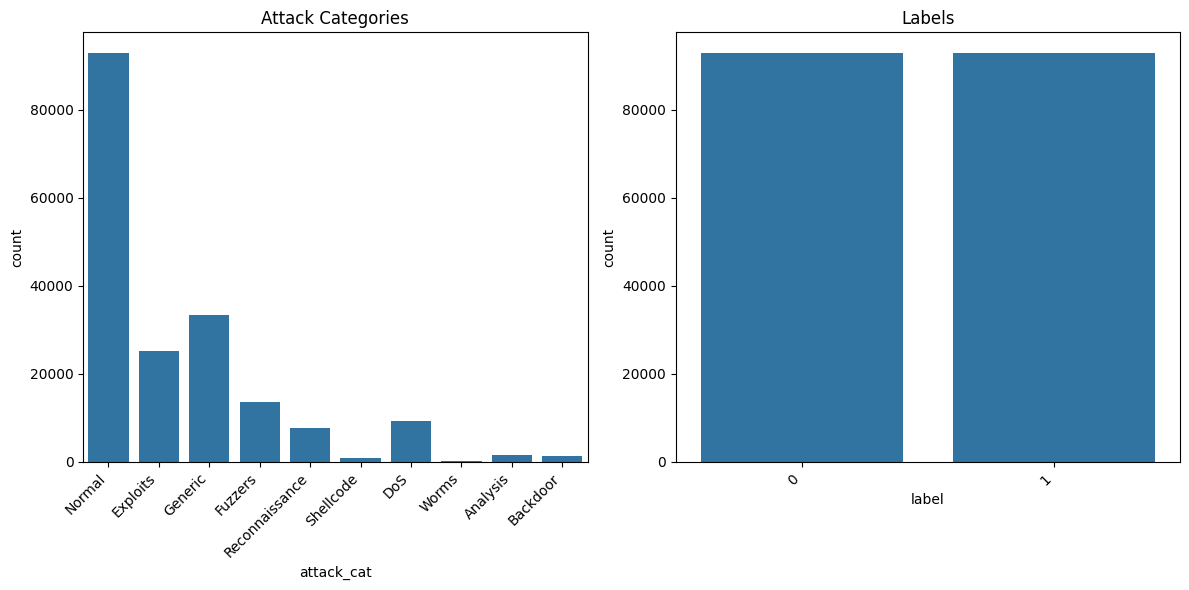

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_df is the combined dataset containing 'attack_cat' and 'label' columns

# Count occurrences of each category in 'attack_cat' and 'label'
attack_cat_counts = df['attack_cat'].value_counts()
label_counts = df['label'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 'attack_cat' as circular chart
sns.countplot(x='attack_cat', data=df, ax=axes[0])
axes[0].set_title('Attack Categories')

# Plot 'label' as circular chart
sns.countplot(x='label', data=df, ax=axes[1])
axes[1].set_title('Labels')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


<ipython-input-15-4e92e921c585>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='attack_cat', data=df, ax=axes[0], palette='husl')
<ipython-input-15-4e92e921c585>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, ax=axes[1], palette=label_colors)
<ipython-input-15-4e92e921c585>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


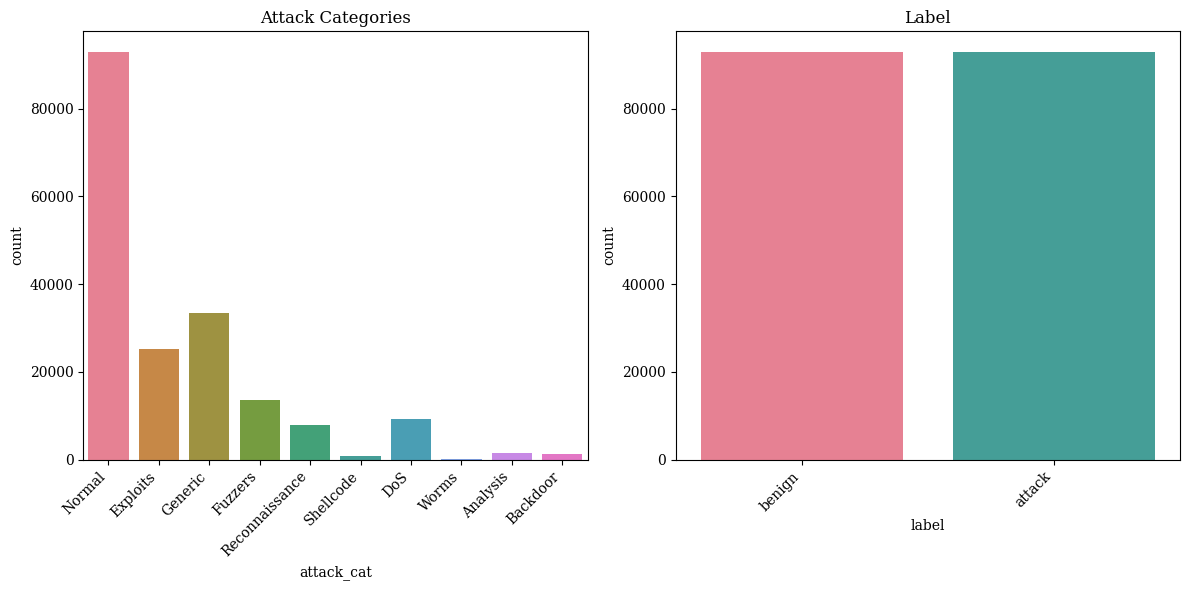

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set font to 'serif'
plt.rcParams['font.family'] = 'serif'
# Assuming combined_df is the combined dataset containing 'attack_cat' and 'label' columns

# Replace 0 with 'benign' and 1 with 'attack' in the 'label' column
df['label'] = df['label'].replace({0: 'benign', 1: 'attack'})

# Count occurrences of each category in 'attack_cat' and 'label'
attack_cat_counts = df['attack_cat'].value_counts()
label_counts = df['label'].value_counts()

# Create custom color palette for label classes
label_colors = sns.color_palette("husl", len(label_counts))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 'attack_cat' as circular chart
sns.countplot(x='attack_cat', data=df, ax=axes[0], palette='husl')
axes[0].set_title('Attack Categories')

# Plot 'label' as circular chart
sns.countplot(x='label', data=df, ax=axes[1], palette=label_colors)
axes[1].set_title('Label')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
attack_cat_counts

attack_cat
Normal            93000
Generic           33442
Exploits          25121
Fuzzers           13659
DoS                9253
Reconnaissance     7816
Analysis           1502
Backdoor           1281
Shellcode           823
Worms               103
Name: count, dtype: int64